<a href="https://colab.research.google.com/github/YanaGlad/MLTask/blob/master/MLTASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Гладких Яна Сергеевна (Stepik)
#Gladkikh Yana (Kaggle) Лучший результат на текущий момент: 0.84310

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn.linear_model import  LogisticRegression 
from sklearn.metrics import f1_score, roc_auc_score, mean_squared_error

In [ ]:
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

In [ ]:
print("Посмотрим на случайные строки в датасете")
print(train_data.sample())
print(train_data.sample())
print(train_data.sample())
print("Посмотрим первые 5 строк датасета")
print(train_data.head())
print("Посмотрим последние 5 строк датасета")
print(train_data.tail())

Посмотрим на случайные строки в датасете
      ClientPeriod  MonthlySpending  ...     PaymentMethod Churn
1654             3             55.3  ...  Electronic check     1

[1 rows x 20 columns]
      ClientPeriod  MonthlySpending  ...     PaymentMethod Churn
3815            60            110.6  ...  Electronic check     0

[1 rows x 20 columns]
     ClientPeriod  MonthlySpending  ...            PaymentMethod Churn
765            24             54.8  ...  Credit card (automatic)     0

[1 rows x 20 columns]
Посмотрим первые 5 строк датасета
   ClientPeriod  MonthlySpending  ...            PaymentMethod Churn
0            55            19.50  ...             Mailed check     0
1            72            25.85  ...  Credit card (automatic)     0
2             1            75.90  ...         Electronic check     1
3            32            79.30  ...             Mailed check     0
4            60           115.25  ...  Credit card (automatic)     0

[5 rows x 20 columns]
Посмотрим последн

In [ ]:
for d in [train_data, test_data]:
    d['TotalSpent'] = d['TotalSpent'].replace(' ', 0)
    d['TotalSpent'] = d['TotalSpent'].astype(float)

In [ ]:
num_cols_with_churn = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Churn']

#Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',  # 0
    'IsSeniorCitizen',  # 1
    'HasPartner',  # 2
    'HasChild',  # 3
    'HasPhoneService',  # 4
    'HasMultiplePhoneNumbers',  # 5
    'HasInternetService',  # 6
    'HasOnlineSecurityService',  # 7
    'HasOnlineBackup',  # 8
    'HasDeviceProtection',  # 9
    'HasTechSupportAccess',  # 10
    'HasOnlineTV',  # 11
    'HasMovieSubscription',  # 12
    'HasContractPhone',  # 13
    'IsBillingPaperless',  # 14
    'PaymentMethod'  # 15
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
train_data.info()
print('Нет пустых значений')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
for i in range(len(cat_cols)):
    print(train_data[cat_cols[i]].value_counts())

Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64
No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64
No    

In [ ]:
train_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.00,0.25,0.83,0.01,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.18
TotalSpent,0.83,0.65,1.00,0.09,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.16
Churn,-0.35,0.18,-0.20,0.16,1.00


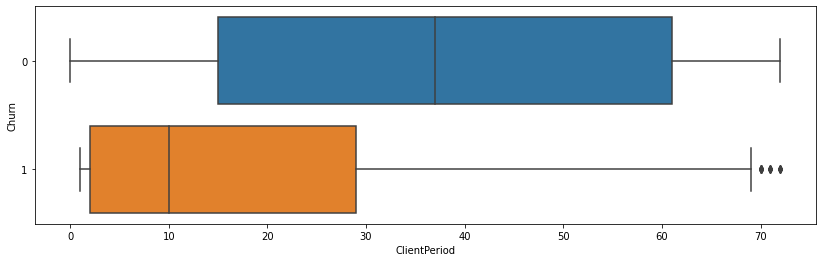

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))  
sns.boxplot( x = train_data.ClientPeriod, y=train_data.Churn, orient='h')

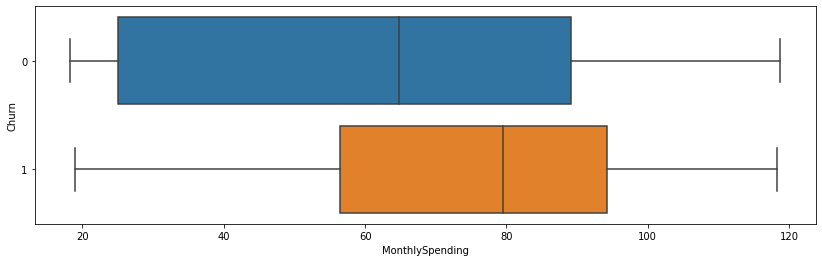

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(x = train_data.MonthlySpending, y = train_data.Churn, orient='h')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99e1265e50>,
      dtype=object)

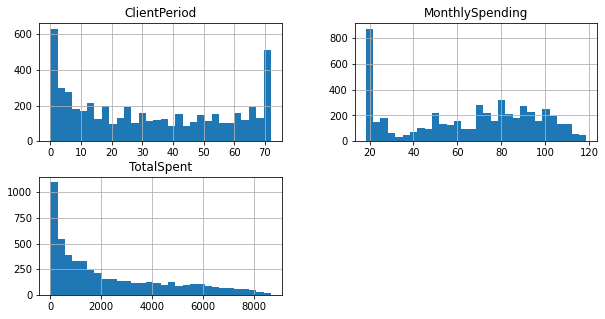

In [ ]:
train_data[num_cols_with_churn].hist(num_cols, figsize=(10, 5), bins=30) 

In [ ]:
print(train_data[target_col].value_counts())
print("Классы не являются сбалансированными т.к. значений класса 0 больше, чем значений класса 1")

0    3898
1    1384
Name: Churn, dtype: int64
Классы не являются сбалансированными т.к. значений класса 0 больше, чем значений класса 1


In [ ]:
label_encoder = LabelEncoder()
for col in cat_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col]  = label_encoder.transform(test_data[col])
    test_data[col]  = test_data[col].astype('category')
    train_data[col] = train_data[col].astype('category')

print(train_data)

      ClientPeriod  MonthlySpending  ...  PaymentMethod Churn
0               55            19.50  ...              3     0
1               72            25.85  ...              1     0
2                1            75.90  ...              2     1
3               32            79.30  ...              3     0
4               60           115.25  ...              1     0
...            ...              ...  ...            ...   ...
5277             3            30.40  ...              2     0
5278            50            44.45  ...              0     0
5279             1            55.05  ...              3     0
5280            29            76.00  ...              1     0
5281            19            75.90  ...              3     0

[5282 rows x 20 columns]


In [ ]:
X = train_data.drop(columns=['Churn'])
y = train_data['Churn']

In [ ]:
dummy = pd.get_dummies(X[cat_cols])
X = pd.concat([X[num_cols], dummy], axis=1)


dummy = pd.get_dummies(test_data[cat_cols])
test_encoded = pd.concat([test_data[num_cols], dummy], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)
test_pred = model.predict(X_test)
 
  
print('MSE:', mean_squared_error(y_test, test_pred))
print('F1 score:', f1_score(y_test, test_pred))
print('ROC-AUC:', roc_auc_score(y_test, test_pred))

MSE: 0.195837275307474
F1 score: 0.5835010060362174
ROC-AUC: 0.7136559289086365


In [ ]:
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          "penalty":["l1","l2", "elasticnet"],
          "solver":["lbfgs", "saga"],
          "random_state":[42]}
          
model = LogisticRegression()
model_cv = GridSearchCV(model, param_grid=params,cv=7)
model_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mode

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [42], 'solver': ['lbfgs', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: ", model_cv.best_params_)
print("Best score: ", model_cv.best_score_)

Best parameters:  {'C': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best score:  0.8063851351881401


In [ ]:
test_pred = model_cv.predict(X_test)
 
print('MSE:', mean_squared_error(y_test, test_pred))
print('F1 score:', f1_score(y_test, test_pred))
print('ROC-AUC:', roc_auc_score(y_test, test_pred))

MSE: 0.1967833491012299
F1 score: 0.5840000000000001
ROC-AUC: 0.7141789317782098


In [ ]:
import numpy as np

In [ ]:
!pip3 install catboost

In [ ]:

from catboost import CatBoostClassifier

X = train_data.drop(columns=['Churn'])
y = train_data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

params = { 'iterations':[100]
          ,'l2_leaf_reg':[1,3,5,10]
          ,'learning_rate':[0.001,0.01]
          ,'depth':[3,5,8,10]
          ,'loss_function':['CrossEntropy']
         }

In [ ]:
model = CatBoostClassifier(cat_features = cat_cols, random_seed=42)
cat_cv = GridSearchCV(model, param_grid = params, cv=3)
cat_cv.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6896553	total: 3.76ms	remaining: 372ms
1:	learn: 0.6865017	total: 7.03ms	remaining: 344ms
2:	learn: 0.6833235	total: 10.5ms	remaining: 339ms
3:	learn: 0.6801424	total: 14ms	remaining: 336ms
4:	learn: 0.6774265	total: 17.2ms	remaining: 326ms
5:	learn: 0.6747075	total: 20.3ms	remaining: 318ms
6:	learn: 0.6716504	total: 23.4ms	remaining: 310ms
7:	learn: 0.6687778	total: 26.5ms	remaining: 305ms
8:	learn: 0.6660027	total: 29.9ms	remaining: 302ms
9:	learn: 0.6631367	total: 32.9ms	remaining: 296ms
10:	learn: 0.6602243	total: 35.9ms	remaining: 291ms
11:	learn: 0.6576087	total: 39ms	remaining: 286ms
12:	learn: 0.6547744	total: 42.1ms	remaining: 282ms
13:	learn: 0.6519715	total: 45.1ms	remaining: 277ms
14:	learn: 0.6497151	total: 48.7ms	remaining: 276ms
15:	learn: 0.6470562	total: 51.8ms	remaining: 272ms
16:	learn: 0.6446116	total: 55ms	remaining: 269ms
17:	learn: 0.6419642	total: 57.9ms	remaining: 264ms
18:	learn: 0

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f99e1022fd0>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [3, 5, 8, 10], 'iterations': [100],
                         'l2_leaf_reg': [1, 3, 5, 10],
                         'learning_rate': [0.001, 0.01],
                         'loss_function': ['CrossEntropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
test_pred = cat_cv.predict(X_test)
print('MSE:', mean_squared_error(y_test, test_pred))
print('F1 score:', f1_score(y_test, test_pred))
print('ROC-AUC:', roc_auc_score(y_test, test_pred))

MSE: 0.18826868495742669
F1 score: 0.5466970387243736
ROC-AUC: 0.6896834212718689


In [ ]:
cat_cv.best_estimator_.fit(X,y)
prediction = cat_cv.best_estimator_.predict_proba(test_data)[:, 1]
print('Prediction', prediction)

0:	learn: 0.6893778	total: 19.1ms	remaining: 1.89s
1:	learn: 0.6854029	total: 38.1ms	remaining: 1.86s
2:	learn: 0.6815264	total: 56.6ms	remaining: 1.83s
3:	learn: 0.6777699	total: 75.1ms	remaining: 1.8s
4:	learn: 0.6740172	total: 93.4ms	remaining: 1.77s
5:	learn: 0.6705948	total: 112ms	remaining: 1.75s
6:	learn: 0.6671283	total: 135ms	remaining: 1.79s
7:	learn: 0.6636858	total: 153ms	remaining: 1.76s
8:	learn: 0.6602028	total: 171ms	remaining: 1.73s
9:	learn: 0.6568953	total: 180ms	remaining: 1.62s
10:	learn: 0.6536020	total: 200ms	remaining: 1.61s
11:	learn: 0.6503820	total: 221ms	remaining: 1.62s
12:	learn: 0.6470364	total: 241ms	remaining: 1.61s
13:	learn: 0.6438064	total: 259ms	remaining: 1.59s
14:	learn: 0.6406052	total: 278ms	remaining: 1.57s
15:	learn: 0.6375023	total: 296ms	remaining: 1.56s
16:	learn: 0.6344156	total: 305ms	remaining: 1.49s
17:	learn: 0.6314531	total: 324ms	remaining: 1.47s
18:	learn: 0.6285823	total: 336ms	remaining: 1.43s
19:	learn: 0.6256654	total: 356ms	rem

In [ ]:
predicted_data = pd.DataFrame(prediction, index = np.arange(len(prediction)), columns=['Churn'])
predicted_data.to_csv('submissionN.csv', index_label='Id')